# Step 2 - Exploring Data

On the previous module you learned a series of techniques and tools for data acquisition. Once we have acquired our data, our very next step is to explore it to identify trends, correlations, errors and/or discrepancies. By the end of this courselet, you will be able to:

1. Recognize the importance of exploring data
2. Use different visualization methods for data exploration
3. Identify the most appropiate analysis method according to your type of data.

For this module, we are going to use datasets from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/). In order to access these data, we need to install to previously install the ucimlrepo library. 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

### Descriptive Statistics

Descriptive statistics are useful when we want to get an overall understanding of our continous features. Also, they are helpful to identify potential data erorrs, for example, if we identify that the mean or the range of the values are not behaving as we would normally expect. 

The easiest way to collect descriptive statistics with Pandas is through the use of the *describe* method. For this task, we are going to use the *wine quality* dataset, which contains a sample of wine quality scores along with the main features of each wine.

In [2]:
# fetch dataset - https://archive.ics.uci.edu/dataset/186/wine+quality
wine_quality = fetch_ucirepo(id=186) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
# Print the features
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [3]:
# Descriptive statistics for the predictive features.
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


## Visualizing our data

A powerful technique to get a quick and effective method to look at our data is the use of visualization techniques. There are multiple types of visualizations, and each of them provide different information from our data. Let's explore some of them. 

### Histogram

Use a histogram when you want to see how the data is distributed.

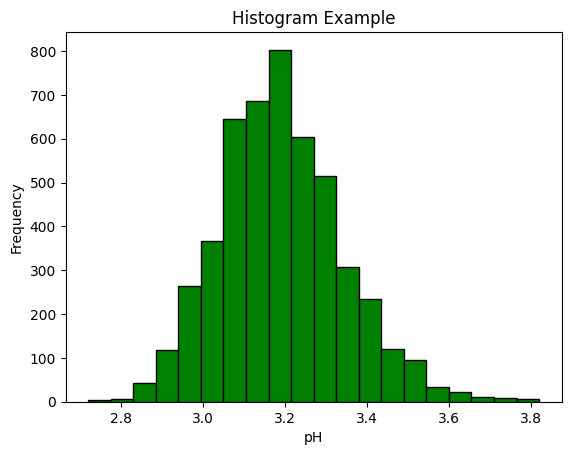

In [4]:
# Histogram
plt.hist(X['pH'], bins=20, color='green', edgecolor='black')

# Add labels and a title
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show the histogram
plt.show()

### Boxplot

Use boxplots when you want to identify descriptive statistics of continous features, as well as potential outliers.

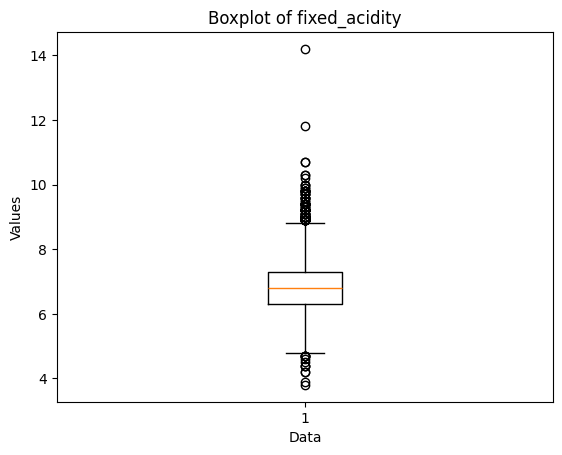

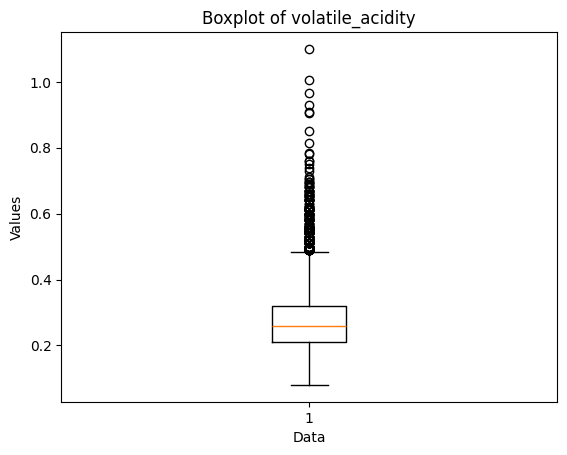

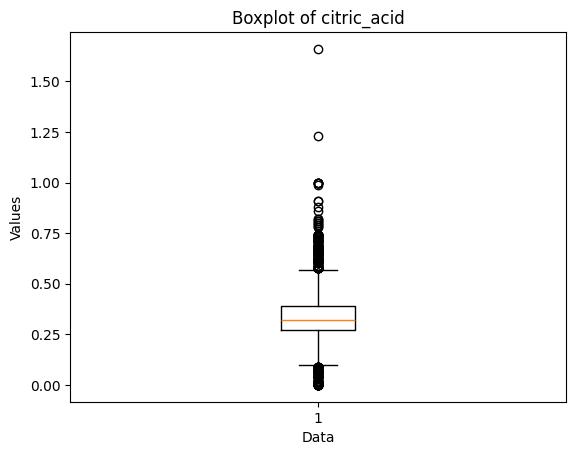

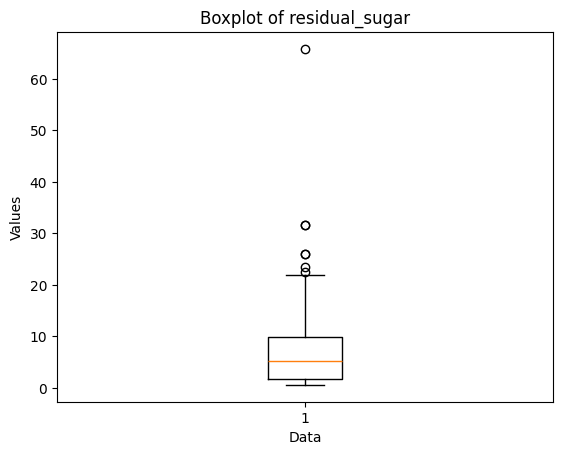

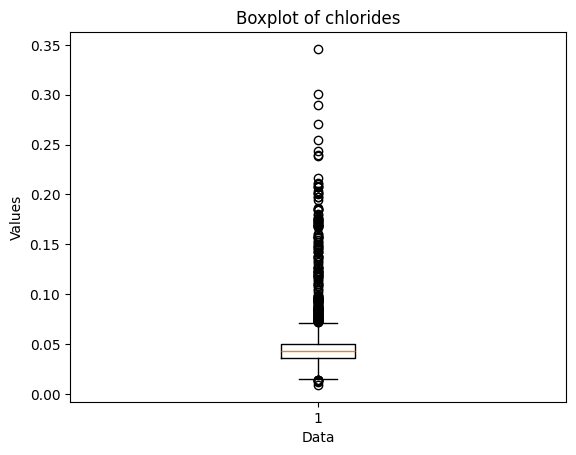

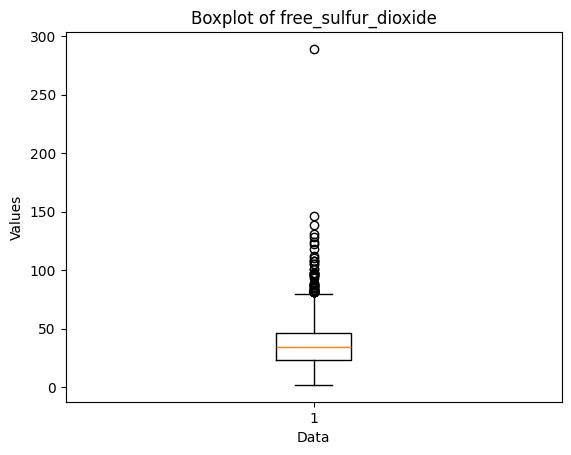

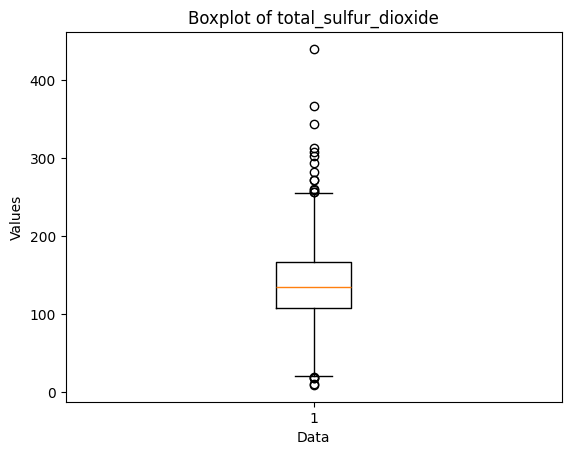

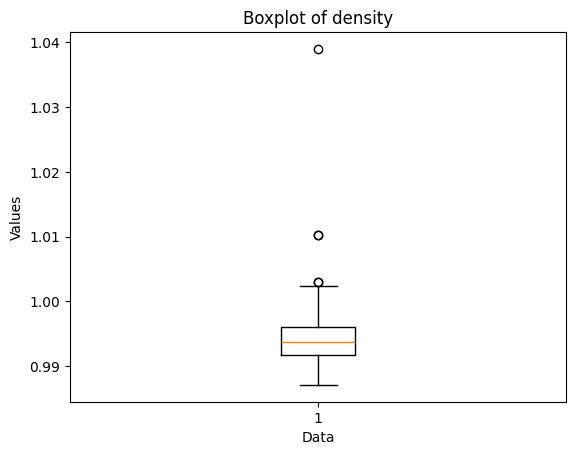

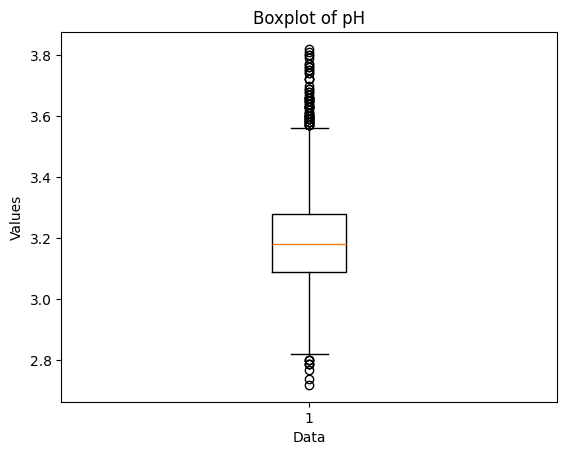

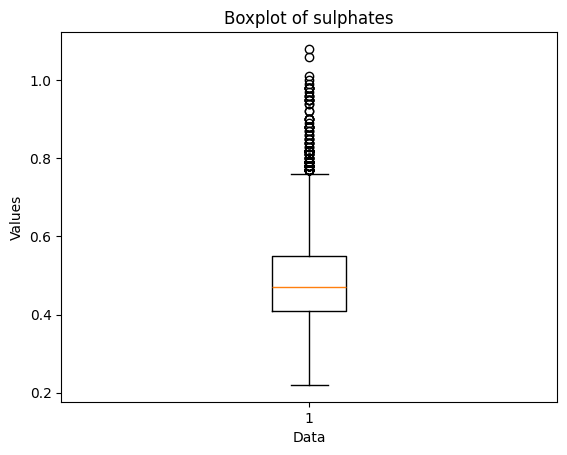

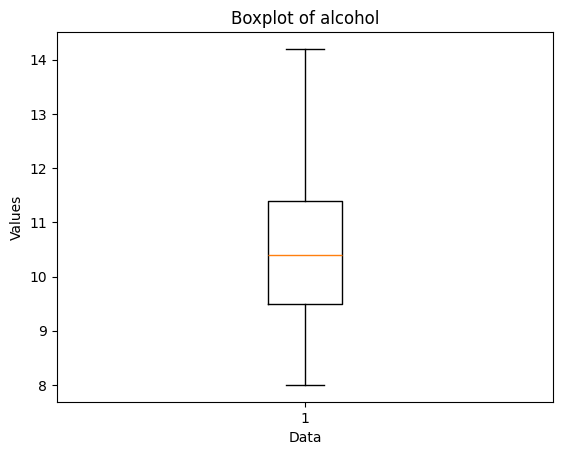

In [5]:
# Boxplot
for column in X.columns:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(X[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Data')
    plt.ylabel('Values')
    plt.show()


### Scatterplot

Use a scatterplot to identify potential correlations within features.

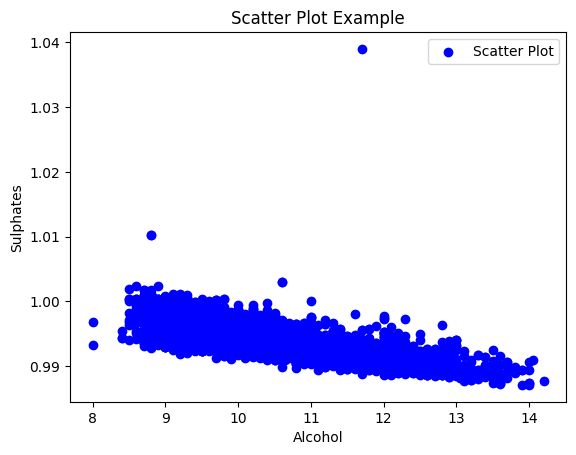

In [6]:
# Scatterplot
plt.scatter(X['alcohol'], X['density'], label='Scatter Plot', color='blue', marker='o')

plt.xlabel('Alcohol')
plt.ylabel('Sulphates')
plt.title('Scatter Plot Example')

# Add a legend
plt.legend()

# Show the scatter plot
plt.show()

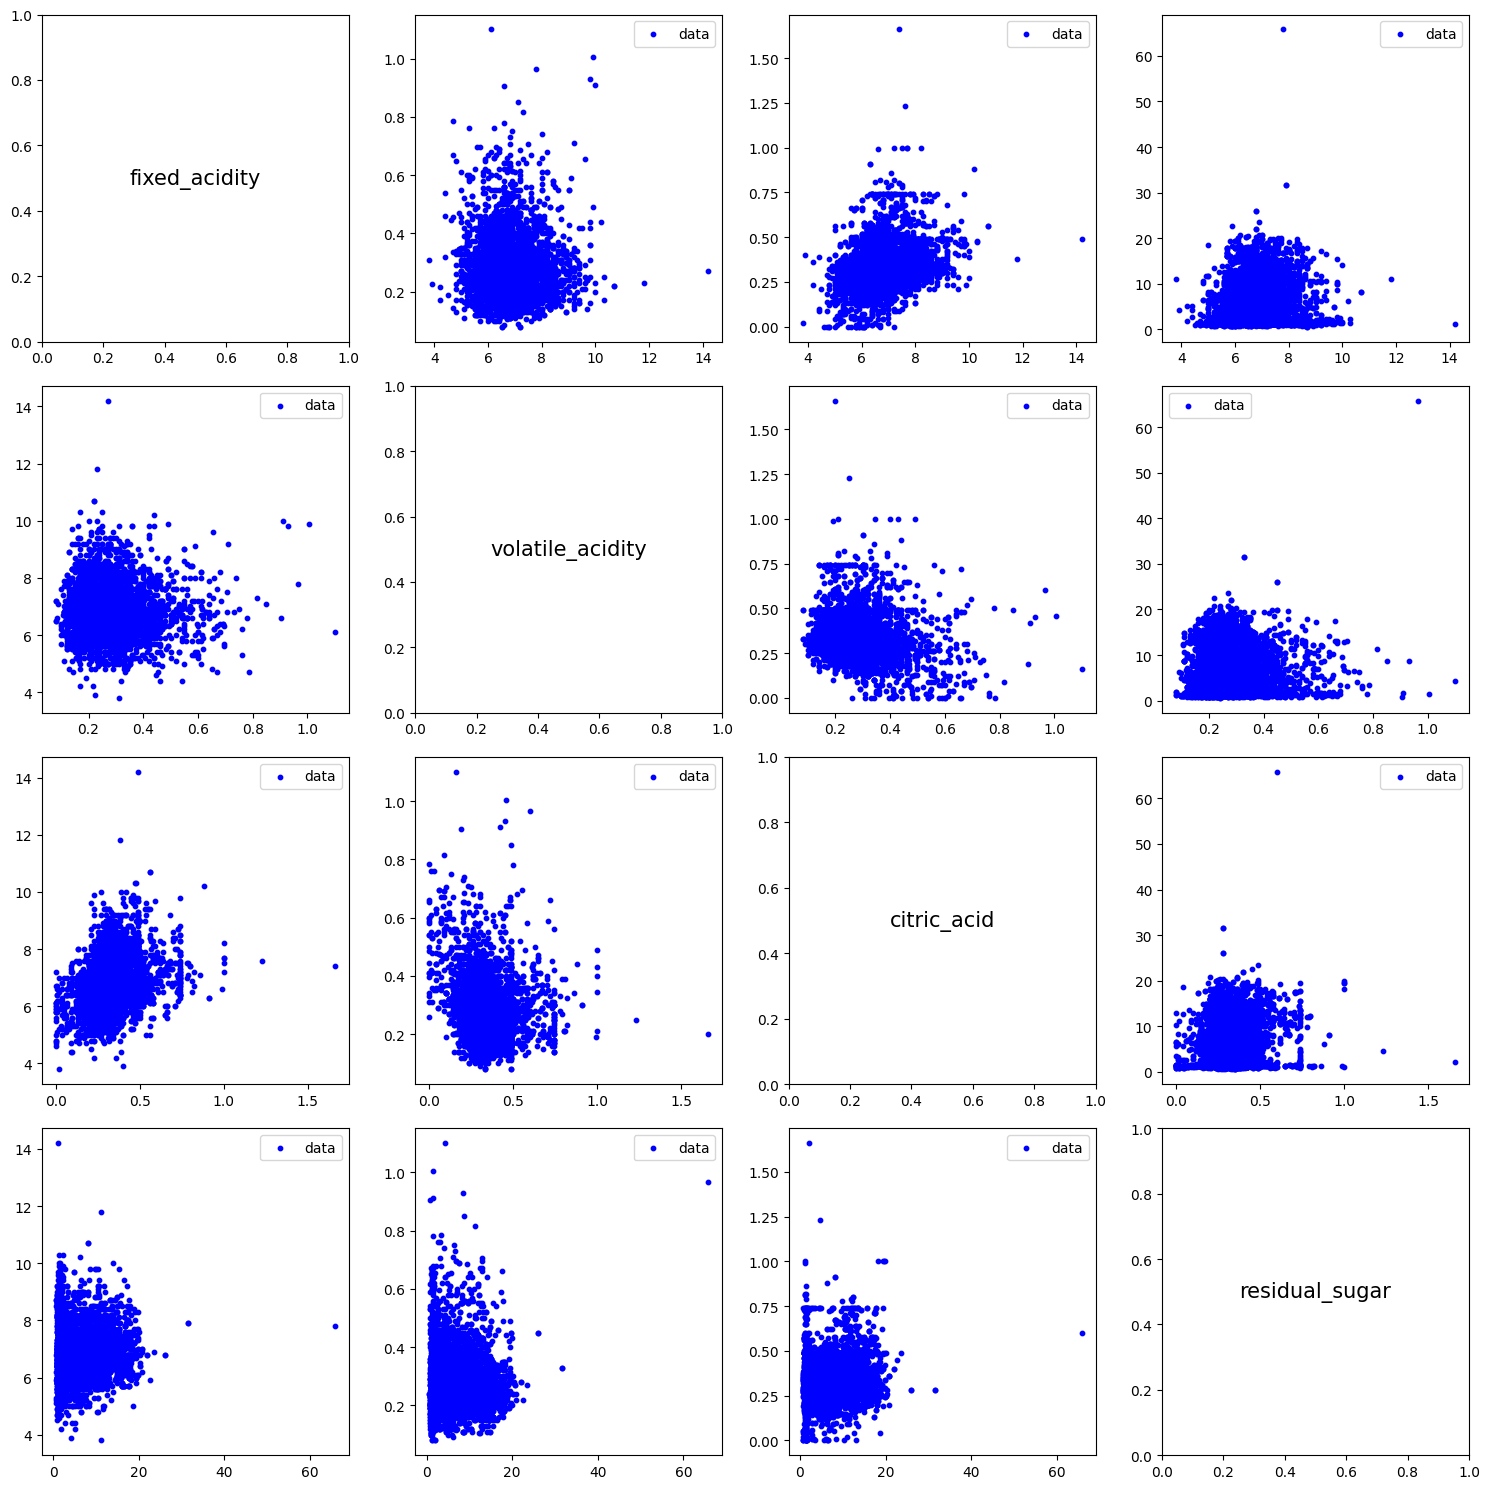

In [7]:
# Scatterplot Grid
fig, axes = plt.subplots(4, 4, figsize=(15, 15)) # We are only using 4 features for visualization purposes.
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        if i == j:
            ax.text(0.5, 0.5, X.columns[i], ha='center', va='center', fontsize=15) 
        else:
            x = X.columns[i]
            y = X.columns[j]
            ax.scatter(X[x], X[y], label="data",color='blue', marker='o', s=10)
            ax.legend()

# Adjust layout for better visibility
plt.tight_layout()

# Show the grid of scatterplots
plt.show()


### Line Graphs

Use a line graph when you want to see the trend of a time series over time. For this chart, we are going to use a new dataset. This data represents the collection of air monitoring from an Air Quality Chemical Multisensor Device in an Italian city. For this simple excercise, we are going to plot the collected temperature of air over time.

In [8]:
# Time Series dataset - https://archive.ics.uci.edu/dataset/360/air+quality
air_quality = fetch_ucirepo(id=360) 
ts = air_quality.data.features

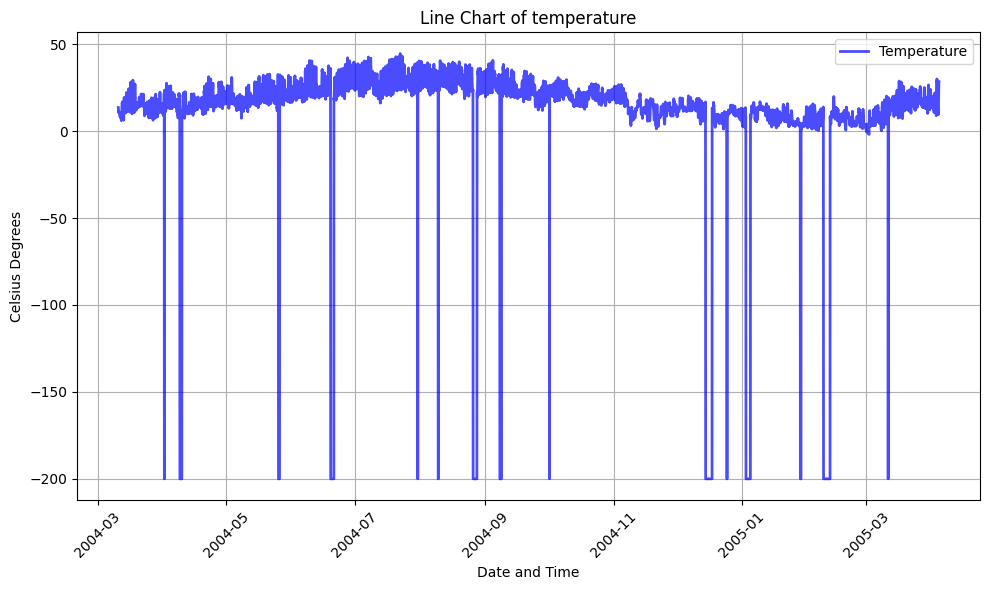

In [9]:
# Line Graphs
ts['Datetime'] = pd.to_datetime(ts['Date'] + ' ' + ts['Time'])

# Extract 'Datetime' and 'Temperature' column data
datetime = ts['Datetime']
temperature = ts['T']

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(datetime, temperature, color='blue', label='Temperature', alpha=0.7, lw=2)  
plt.title('Line Chart of temperature')
plt.xlabel('Date and Time')
plt.ylabel('Celsius Degrees')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 

# Show the line chart
plt.tight_layout()
plt.show()

One of the first things that might catch your attenttion with this series is the fact that we have multiple dates for which the registered temperature on air is -200 degrees celsius, which is physically impossible to occur. How should we threat these data points? That's a topic for the module. 

### Heatmap

Use a heatmap as a tool to explore a geographical region and understand your data's behavior across your region of interest. 

For this visualization, we are going to use open data from the [Chicago Data Portal](https://data.cityofchicago.org/). We are going to display the crime rate distribution across the city's neigborhoods to identify neighborhoods with the highest crime rates.

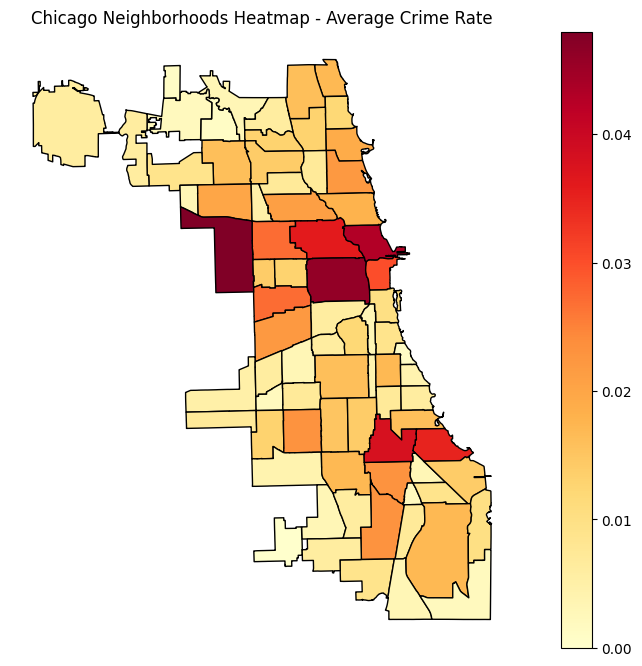

In [10]:
# Heatmap

# First, we load Chicago community areas shapefile
neighborhoods = gpd.read_file('https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=Shapefile')

# Now we load Chicago's crime data (replace 'your_crime_data.csv' with your dataset)
crime_data = pd.read_csv('https://data.cityofchicago.org/resource/ijzp-q8t2.csv')

# We need to do a few steps to combine data
crime_data = crime_data[['community_area', 'primary_type']]
crime_count_by_neighborhood = crime_data['community_area'].value_counts().reset_index()
crime_count_by_neighborhood.columns = ['Community Area', 'Crime Count']
neighborhoods['area_numbe'] = neighborhoods['area_numbe'].astype('int64')
neighborhoods = neighborhoods.merge(crime_count_by_neighborhood, left_on='area_numbe', right_on='Community Area', how='left')

# Fill NaN values with 0 (no crime data)
neighborhoods['Crime Count'].fillna(0, inplace=True)

# Calculate the average crime rate per neighborhood
neighborhoods['Crime Rate'] = neighborhoods['Crime Count'] / neighborhoods['Crime Count'].sum()

# Plot the Chicago neighborhoods heatmap based on average crime rate
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
neighborhoods.plot(column='Crime Rate', cmap='YlOrRd', edgecolor='k', legend=True, ax=ax)
ax.set_title('Chicago Neighborhoods Heatmap - Average Crime Rate')
ax.axis('off')
plt.show()